In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
bikeshare = pd.read_csv('datasets/bikesharing.csv')

In [3]:
# Dummy dataframe
bikes = pd.read_csv('datasets/bikesharing.csv')

In [4]:
bikeshare.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
bikeshare.drop('instant',axis=1,inplace=True)

In [6]:
bikeshare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    int64  
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  casual      730 non-null    int64  
 13  registered  730 non-null    int64  
 14  cnt         730 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 85.7+ KB


### All data fields seem to be in the correct datatype

# Checking Null data :

In [7]:
bikeshare.isnull().sum()

dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

# Dropping Irrelevant Columns :
- 'casual' and 'registered' columns are extra as they add no value
- 'cnt' column is summation of the 'casual' and the 'registered' columns.
- Thus it makes more sense to retain just one column to serve one purpose instead of 3

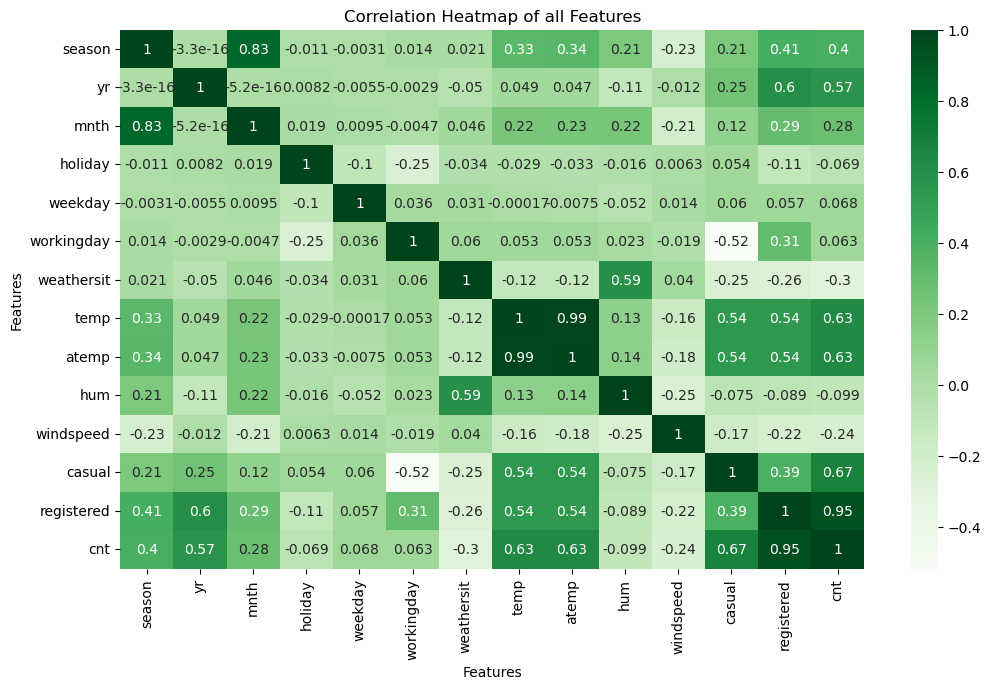

In [8]:
plt.figure(figsize=(12,7))
sns.heatmap(bikeshare.corr(),annot=True,cmap='Greens')
plt.xlabel('Features')
plt.ylabel('Features')
plt.title('Correlation Heatmap of all Features')
plt.show()

## Columns to be Dropped - 
- atemp
- casual
- registered
<br>
<br>
Reason:
- atemp is highly correlated with temp
- casual & registered are highly correlated with cnt 

In [9]:
bikeshare.drop('atemp',axis=1,inplace=True)

In [10]:
bikeshare.drop('casual',axis=1,inplace=True)

In [11]:
bikeshare.drop('registered',axis=1,inplace=True)

In [12]:
# 'workingday' column covers the 'holiday' column as the 'holiday' column only marks national holidays
bikeshare.drop('holiday',axis=1,inplace=True)

In [13]:
bikeshare.drop('dteday',axis=1,inplace=True)

In [14]:
bikeshare.head()

,season,yr,mnth,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,6,0,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,0,2,14.902598,69.6087,16.652113,801
2,1,0,1,1,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,2,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,3,1,1,9.305237,43.6957,12.522300,1600


# Mapping Categorical Variables :

In [15]:
yr_dict = {0:'2018',1:'2019'}
mnth_dict = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sept',10:'Oct',11:'Nov',12:'Dec'}
weather_dict = {1:'Clear',2:'Mist',3:'Light',4:'Heavy'}
day_dict = {0:'Tuesday',1:'Wednesday',2:'Thursday',3:'Friday',4:'Saturday',5:'Sunday',6:'Monday'}
season_dict = {1:'Spring',2:'Summer',3:'Fall',4:'Winter'}
working_dict = {1:'Working Day',0:'Holiday'}

In [16]:
bikeshare['mnth']=bikeshare['mnth'].map(mnth_dict)

In [17]:
bikeshare['weathersit'] = bikeshare['weathersit'].map(weather_dict)

In [18]:
bikeshare['weekday'] = bikeshare['weekday'].map(day_dict)

In [19]:
bikeshare['season'] = bikeshare['season'].map(season_dict)

In [20]:
bikeshare['yr'] = bikeshare['yr'].map(yr_dict)

In [21]:
bikeshare['workingday'] = bikeshare['workingday'].map(working_dict)

In [22]:
#Rename hum to humidity & weathersit to weather
bikeshare.rename(columns={'hum':'humidity','weathersit':'weather'},inplace=True)

In [23]:
bikeshare.head()

,season,yr,mnth,weekday,workingday,weather,temp,humidity,windspeed,cnt
0,Spring,2018,Jan,Monday,Holiday,Mist,14.110847,80.5833,10.749882,985
1,Spring,2018,Jan,Tuesday,Holiday,Mist,14.902598,69.6087,16.652113,801
2,Spring,2018,Jan,Wednesday,Working Day,Clear,8.050924,43.7273,16.636703,1349
3,Spring,2018,Jan,Thursday,Working Day,Clear,8.200000,59.0435,10.739832,1562
4,Spring,2018,Jan,Friday,Working Day,Clear,9.305237,43.6957,12.522300,1600


In [24]:
col_cont = {'temp','humidity','windspeed'}
col_cat = {'season','yr','mnth','weekday','workingday','weather'}
target = ['cnt']

# Visualizations

# Univariate Analysis :

### Create Distribution graphs for Continuous Variables

/Users/atharvganla/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


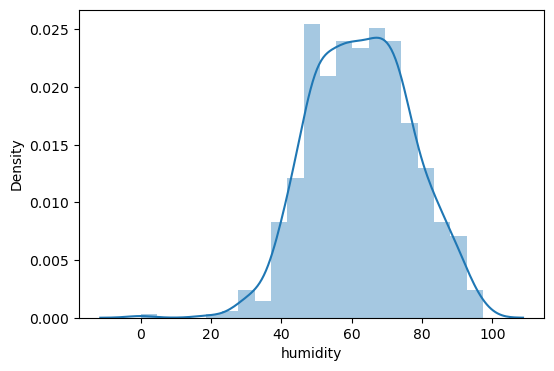

/Users/atharvganla/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


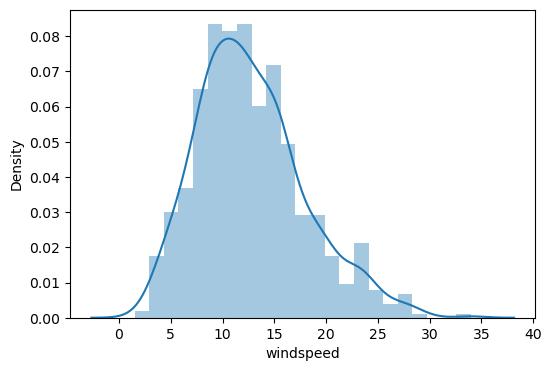

/Users/atharvganla/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


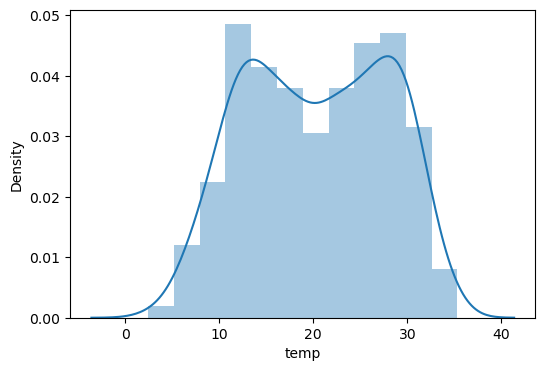

In [25]:
for x in col_cont:
    plt.figure(figsize=(6,4))
    sns.distplot(bikeshare[x])
    plt.show()

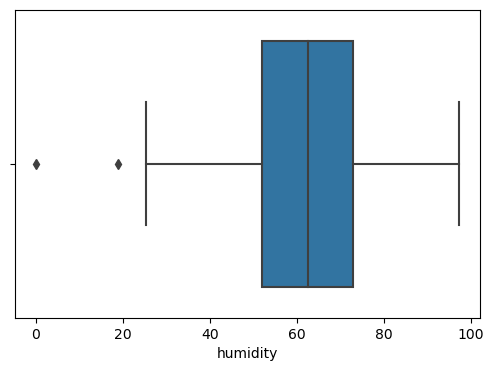

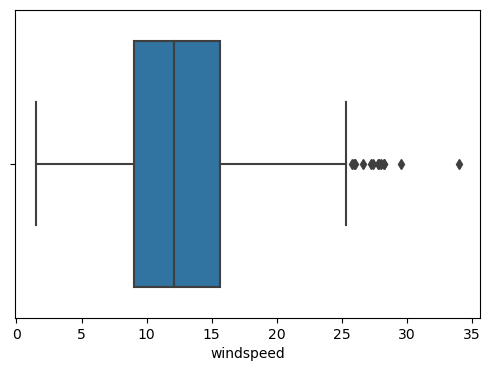

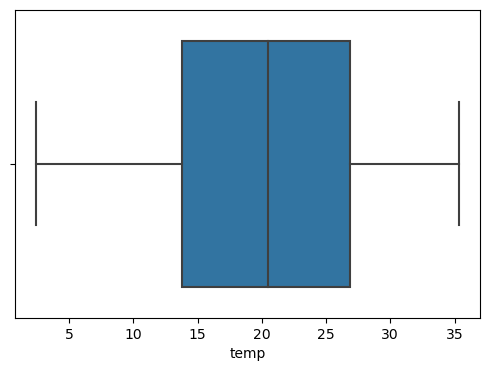

In [26]:
for x in col_cont:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=bikeshare[x])
    plt.show()

### Create graphs for Categorical Variables

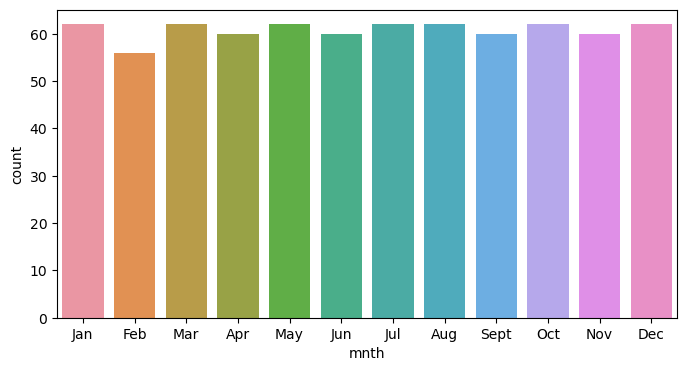

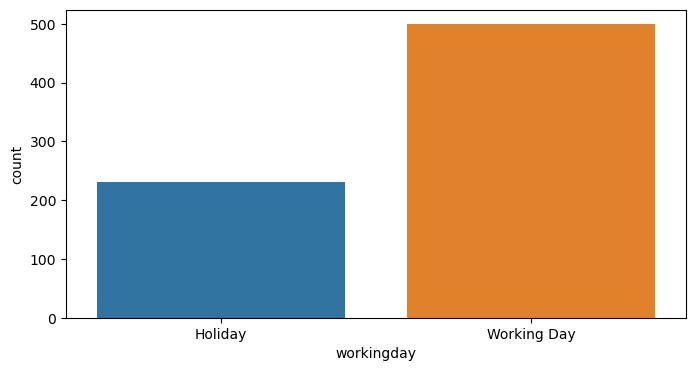

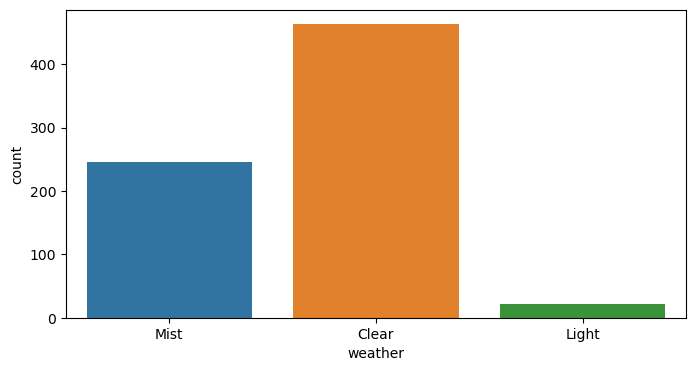

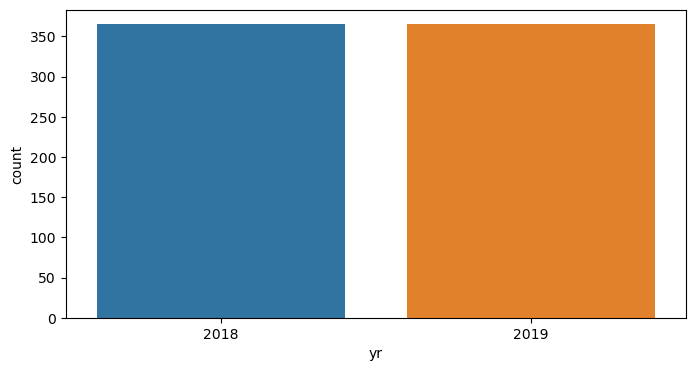

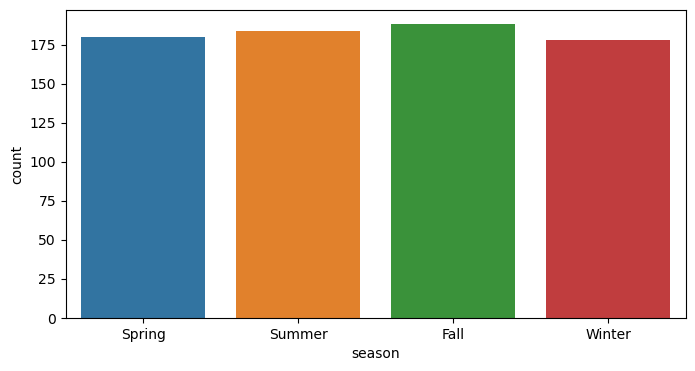

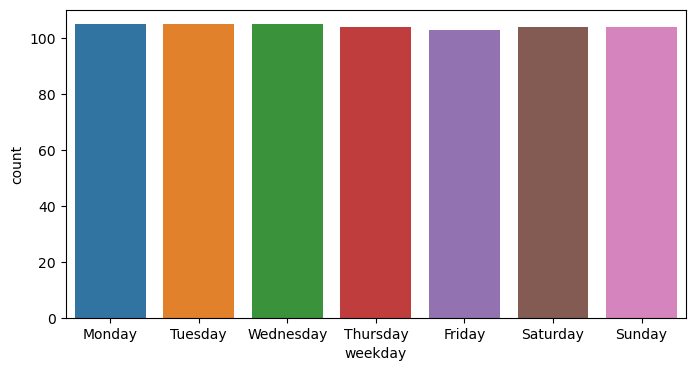

In [27]:
for x in col_cat:
    plt.figure(figsize=(8,4))
    sns.countplot(x=bikeshare[x])
    plt.show()

# Bivariate Analysis:

### Analysis of Continuous Variables with the 'cnt' Column (target variable) with 'yr' as hue

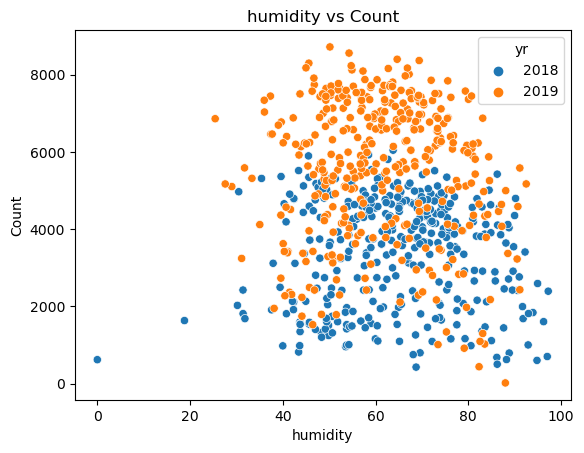

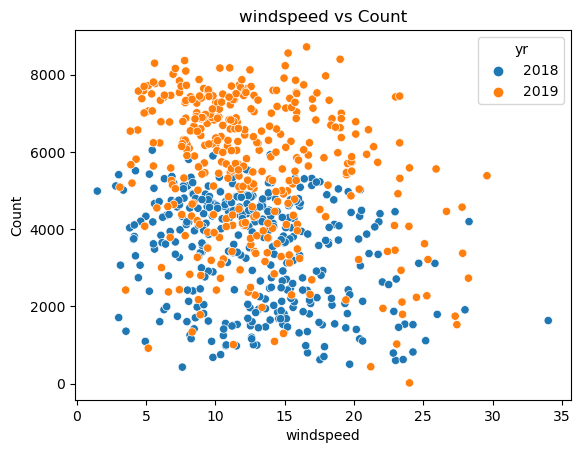

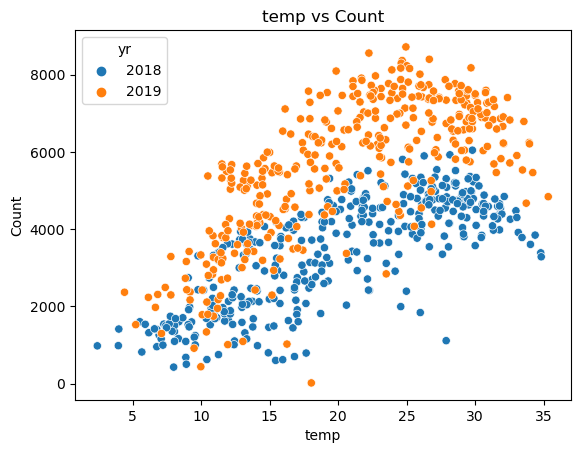

In [28]:
for x in col_cont:
    sns.scatterplot(data = bikeshare, x=x, y='cnt', hue = bikeshare['yr'])
    plt.xlabel(x)
    plt.ylabel('Count')
    plt.title(x+" vs Count")
    plt.show()

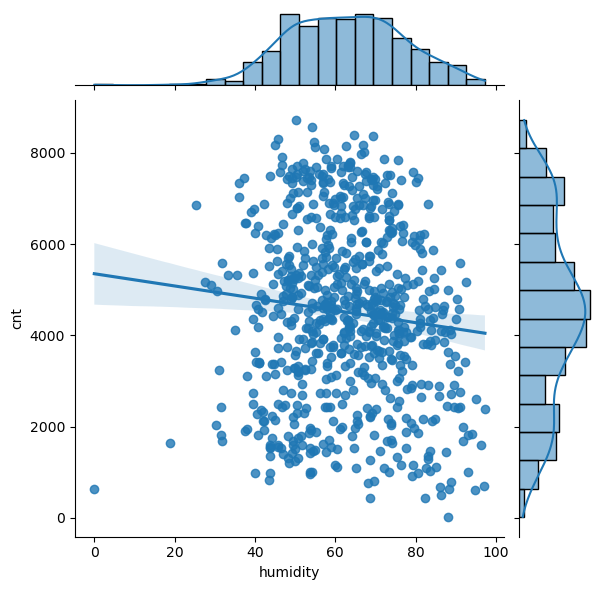

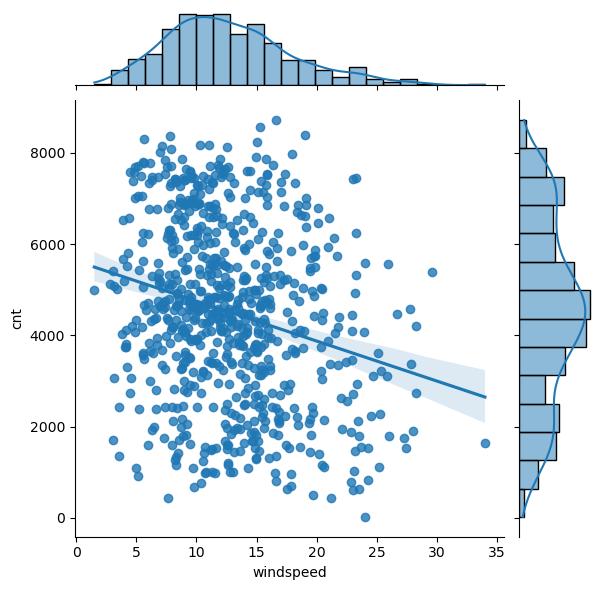

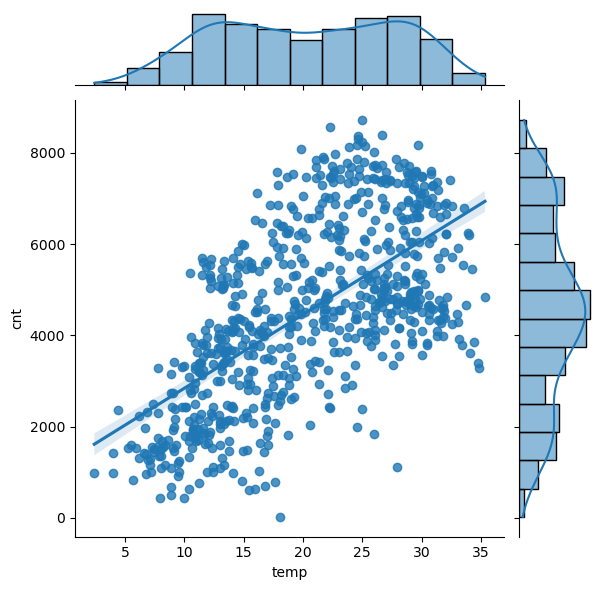

In [29]:
for x in col_cont:
    sns.jointplot(x=bikeshare[x], y=bikeshare['cnt'], kind = 'reg')
    plt.xlabel(x)
    plt.ylabel('Count')
    plt.show()

### Observation from Above Graphs:
- The above jointplots show that windspeed and humidity have a negative correlation with count
- Meanwhile, we can see that temp has a positive correlation with count

### Analysis of Categorical Variables with the 'cnt' Column (target variable) using Boxplots

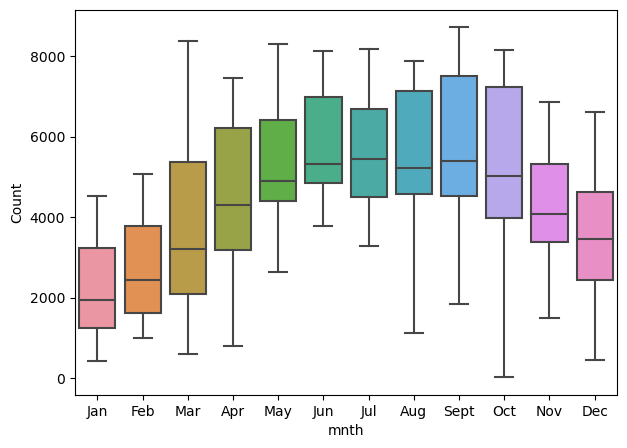

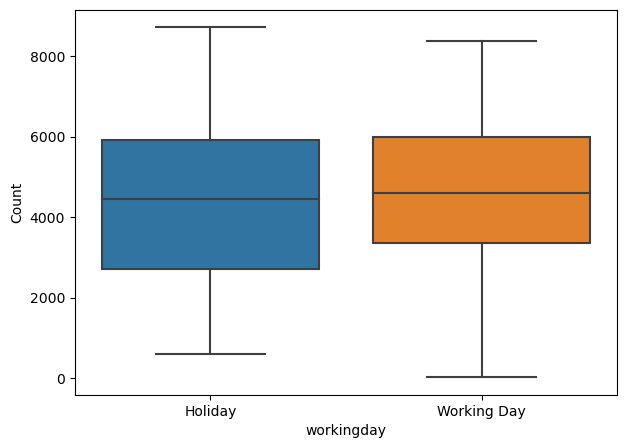

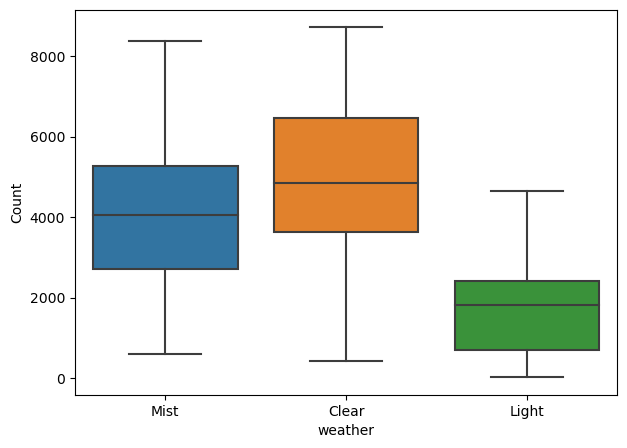

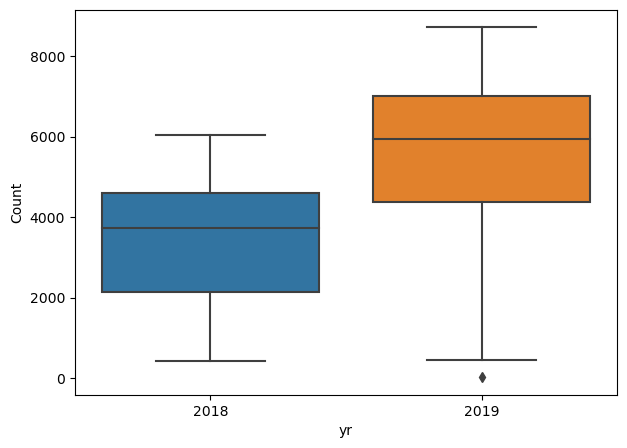

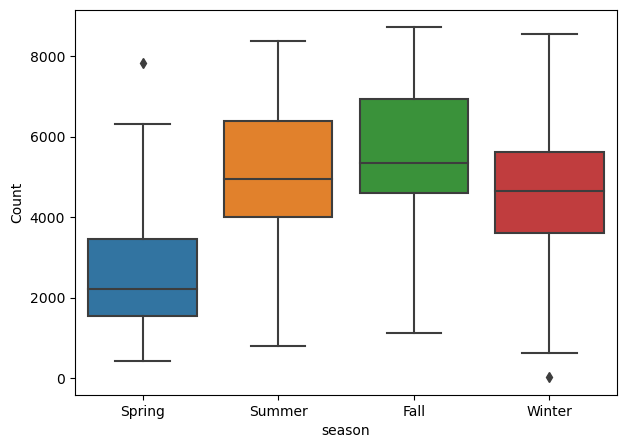

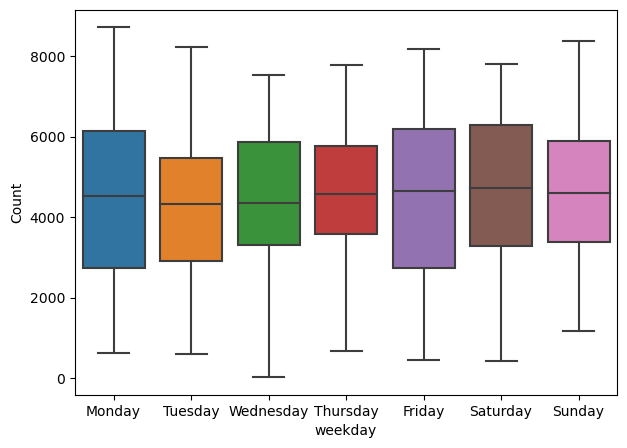

In [30]:
for x in col_cat:
    plt.figure(figsize=(7,5))
    sns.boxplot(data=bikeshare,x=x,y='cnt')
    plt.xlabel(x)
    plt.ylabel('Count')
    plt.show()

## Month Distribution - 
- Shows the monthly count of bikes rented below
- Winter months have the least count, while Summer and Fall months are prominent

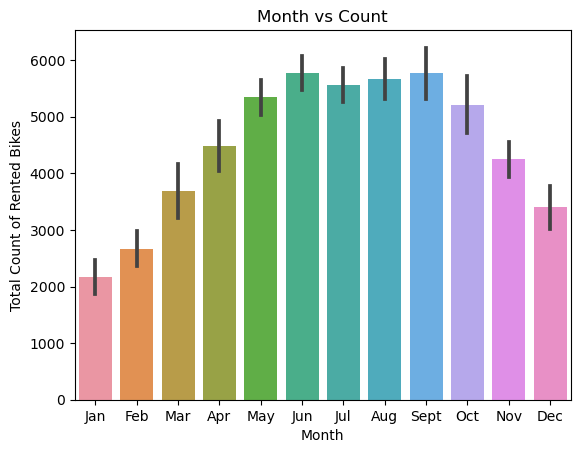

In [31]:
sns.barplot(data = bikeshare, x='mnth',y='cnt')
plt.xlabel('Month')
plt.ylabel('Total Count of Rented Bikes')
plt.title('Month vs Count')
plt.show()

# Seasonal Distribution - 
- If we compare the below seasonal distribution graph with the above monthly distribution graph, we can see the trends match
- Summer and Fall are the most prominent for bike rentals

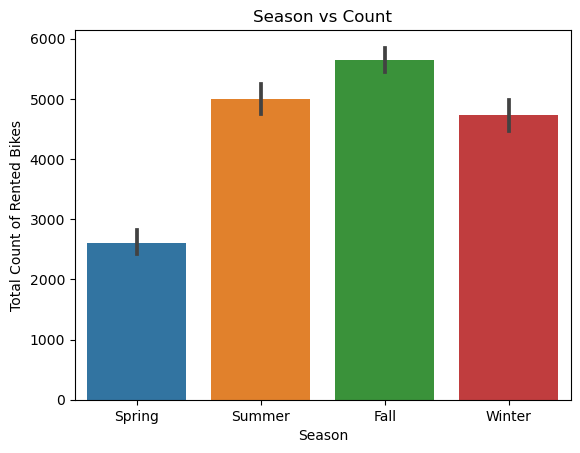

In [32]:
sns.barplot(data = bikeshare, x='season',y='cnt')
plt.xlabel('Season')
plt.ylabel('Total Count of Rented Bikes')
plt.title('Season vs Count')
plt.show()

# Weather Distribution
- The below pie plot shows that no bikes are rented under 'Heavy' weather conditions.
- 'Clear' Weather is the best condition when users rent the bikes
<br>

## Harsher the weather, lesser the number of bikes are being rented

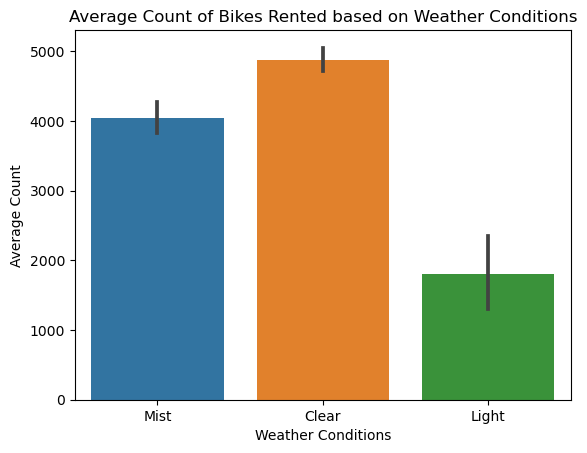

In [33]:
sns.barplot(data=bikeshare, x='weather',y='cnt')
plt.xlabel('Weather Conditions')
plt.ylabel('Average Count')
plt.title('Average Count of Bikes Rented based on Weather Conditions')
plt.show()

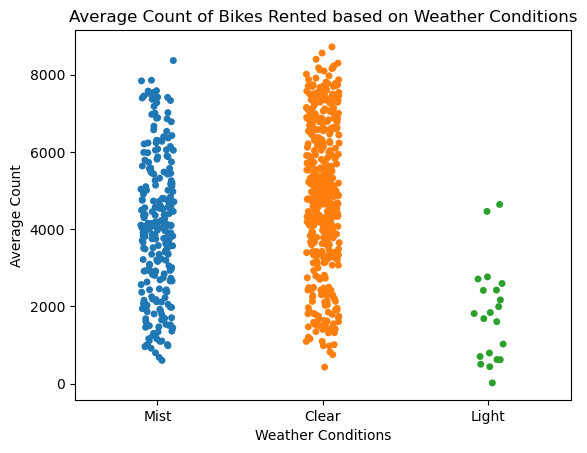

In [34]:
sns.stripplot(data=bikeshare, x='weather',y='cnt')
plt.xlabel('Weather Conditions')
plt.ylabel('Average Count')
plt.title('Average Count of Bikes Rented based on Weather Conditions')
plt.show()

# Daily Distribution:
- Shows the day-wise count of rented bikes

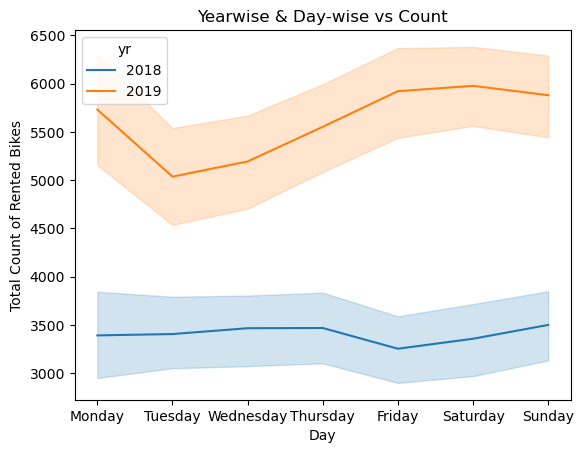

In [35]:
sns.lineplot(data = bikeshare, x = 'weekday', y = 'cnt',hue='yr')
plt.xlabel('Day')
plt.ylabel('Total Count of Rented Bikes')
plt.title('Yearwise & Day-wise vs Count')
plt.show()

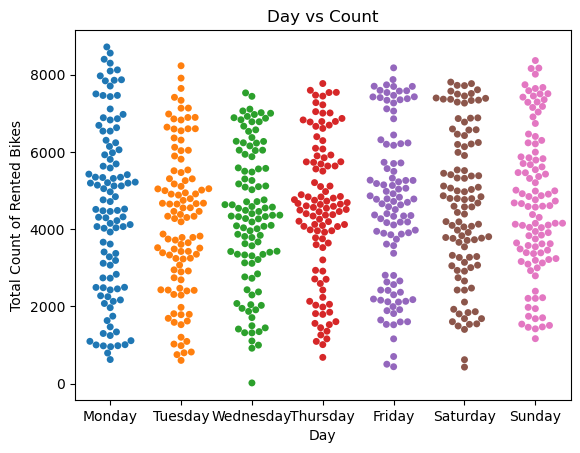

In [36]:
sns.swarmplot(data = bikeshare, x = 'weekday', y = 'cnt')
plt.xlabel('Day')
plt.ylabel('Total Count of Rented Bikes')
plt.title('Day vs Count')
plt.show()

# Count of bikes rented on Working & Non-Working Days

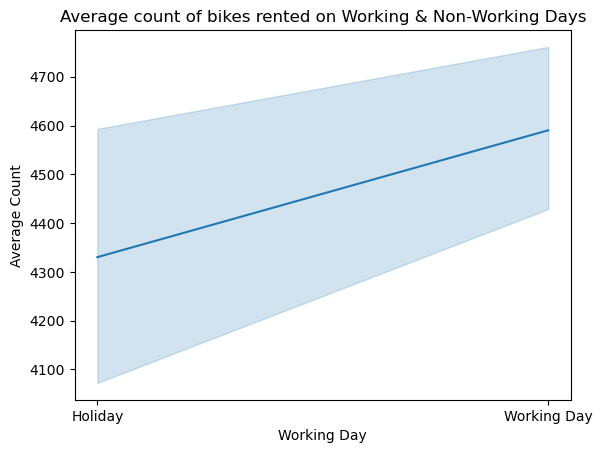

In [37]:
sns.lineplot(data = bikeshare, x='workingday', y='cnt')
plt.xlabel('Working Day')
plt.ylabel('Average Count')
plt.title('Average count of bikes rented on Working & Non-Working Days')
plt.show()

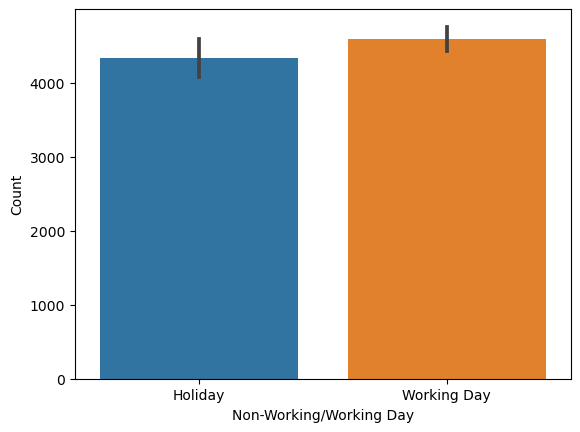

In [38]:
sns.barplot(x=bikeshare['workingday'],y=bikeshare['cnt'])
plt.xlabel('Non-Working/Working Day')
plt.ylabel('Count')

plt.show()

# Year-wise & Season-wise Distribution

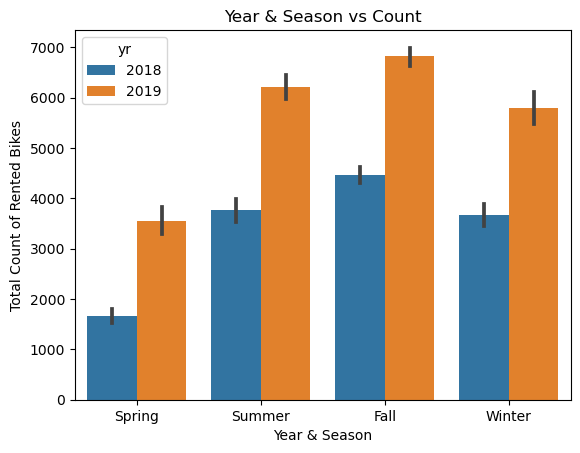

In [39]:
sns.barplot(data = bikeshare, x='season',y='cnt',hue='yr')
plt.xlabel('Year & Season')
plt.ylabel('Total Count of Rented Bikes')
plt.title('Year & Season vs Count')
plt.show()

In [40]:
bikeshare.head()

,season,yr,mnth,weekday,workingday,weather,temp,humidity,windspeed,cnt
0,Spring,2018,Jan,Monday,Holiday,Mist,14.110847,80.5833,10.749882,985
1,Spring,2018,Jan,Tuesday,Holiday,Mist,14.902598,69.6087,16.652113,801
2,Spring,2018,Jan,Wednesday,Working Day,Clear,8.050924,43.7273,16.636703,1349
3,Spring,2018,Jan,Thursday,Working Day,Clear,8.200000,59.0435,10.739832,1562
4,Spring,2018,Jan,Friday,Working Day,Clear,9.305237,43.6957,12.522300,1600


In [ ]:
plt.figure(figsize=(5,5))
sns.pairplot(bikeshare)
plt.show()

<Figure size 500x500 with 0 Axes>

### Observation:
- temp vs cnt graph shows a linear correlation

# Preprocessing for Model Building:
- Changing values of Categorical Variables back to numerical format 

In [ ]:
yr_code = {'2018':0,'2019':1}
working_code = {'Working Day':1,'Holiday':0}

In [ ]:
bikeshare['yr'] = bikeshare['yr'].map(yr_code)

In [44]:
bikeshare['workingday'] = bikeshare['workingday'].map(working_code)

In [45]:
bikeshare.head()

,season,yr,mnth,weekday,workingday,weather,temp,humidity,windspeed,cnt
0,Spring,0,Jan,Monday,0,Mist,14.110847,80.5833,10.749882,985
1,Spring,0,Jan,Tuesday,0,Mist,14.902598,69.6087,16.652113,801
2,Spring,0,Jan,Wednesday,1,Clear,8.050924,43.7273,16.636703,1349
3,Spring,0,Jan,Thursday,1,Clear,8.200000,59.0435,10.739832,1562
4,Spring,0,Jan,Friday,1,Clear,9.305237,43.6957,12.522300,1600


In [46]:
dummy = pd.get_dummies(bikeshare[['season','mnth','weekday','weather']], drop_first = True)

In [47]:
dummy.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth_Oct,mnth_Sept,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weather_Light,weather_Mist
0,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
bikeshare = pd.concat([bikeshare,dummy],axis=1)

In [49]:
bikeshare.head()

,season,yr,mnth,weekday,workingday,weather,temp,humidity,windspeed,cnt,...,mnth_Oct,mnth_Sept,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weather_Light,weather_Mist
0,Spring,0,Jan,Monday,0,Mist,14.110847,80.5833,10.749882,985,...,0,0,1,0,0,0,0,0,0,1
1,Spring,0,Jan,Tuesday,0,Mist,14.902598,69.6087,16.652113,801,...,0,0,0,0,0,0,1,0,0,1
2,Spring,0,Jan,Wednesday,1,Clear,8.050924,43.7273,16.636703,1349,...,0,0,0,0,0,0,0,1,0,0
3,Spring,0,Jan,Thursday,1,Clear,8.200000,59.0435,10.739832,1562,...,0,0,0,0,0,1,0,0,0,0
4,Spring,0,Jan,Friday,1,Clear,9.305237,43.6957,12.522300,1600,...,0,0,0,0,0,0,0,0,0,0


In [50]:
bikeshare.drop(['season','mnth','weekday','weather'],axis=1,inplace=True)

In [51]:
bikeshare.head()

,yr,workingday,temp,humidity,windspeed,cnt,season_Spring,season_Summer,season_Winter,mnth_Aug,...,mnth_Oct,mnth_Sept,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weather_Light,weather_Mist
0,0,0,14.110847,80.5833,10.749882,985,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,14.902598,69.6087,16.652113,801,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,0,1,8.050924,43.7273,16.636703,1349,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,1,8.200000,59.0435,10.739832,1562,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,1,9.305237,43.6957,12.522300,1600,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Splitting Dataset

In [52]:
bikeshare_train, bikeshare_test = train_test_split(bikeshare,train_size = 0.70, random_state=100)

In [53]:
bikeshare_train.shape

(510, 28)

In [54]:
bikeshare_test.shape

(220, 28)

### Scale the numeric values that are not defined using 0s and 1s

In [55]:
bikeshare.columns

Index(['yr', 'workingday', 'temp', 'humidity', 'windspeed', 'cnt',
       'season_Spring', 'season_Summer', 'season_Winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sept', 'weekday_Monday',
       'weekday_Saturday', 'weekday_Sunday', 'weekday_Thursday',
       'weekday_Tuesday', 'weekday_Wednesday', 'weather_Light',
       'weather_Mist'],
      dtype='object')

In [56]:
cols = ['temp','humidity','windspeed','cnt']

In [57]:
scaler = StandardScaler()
bikeshare_train[cols] = scaler.fit_transform(bikeshare_train[cols])
bikeshare_train.head()

,yr,workingday,temp,humidity,windspeed,cnt,season_Spring,season_Summer,season_Winter,mnth_Aug,...,mnth_Oct,mnth_Sept,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weather_Light,weather_Mist
576,1,1,1.230870,0.515796,-0.331282,1.401236,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
426,1,0,-0.421238,-0.070634,-0.386359,-0.215182,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
728,1,0,-1.295618,-1.046051,2.017388,-1.380030,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
482,1,0,-0.628327,-1.001847,-0.780539,-0.136157,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
111,0,1,-0.849222,0.695551,0.354275,-1.438016,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1


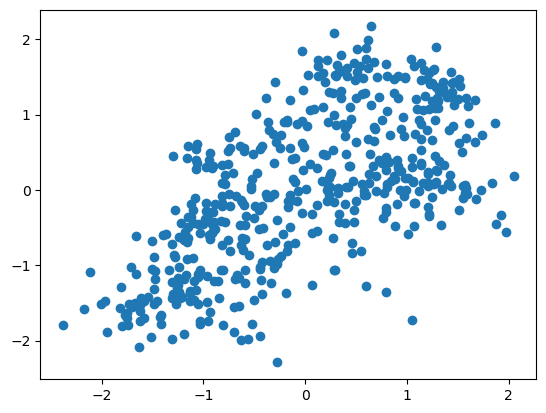

In [58]:
plt.scatter('temp','cnt',data=bikeshare_train)
plt.show()

## Observation:
- The graph of 'temp' vs 'cnt' after scaling is similar to the graph of 'temp' vs 'cnt' before scaling

# Building the Model

In [59]:
y_train = bikeshare_train.pop('cnt')
X_train = bikeshare_train

In [60]:
X_train.shape, y_train.shape

((510, 27), (510,))

In [61]:
X_train.head()

,yr,workingday,temp,humidity,windspeed,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,...,mnth_Oct,mnth_Sept,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weather_Light,weather_Mist
576,1,1,1.230870,0.515796,-0.331282,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
426,1,0,-0.421238,-0.070634,-0.386359,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
728,1,0,-1.295618,-1.046051,2.017388,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
482,1,0,-0.628327,-1.001847,-0.780539,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
111,0,1,-0.849222,0.695551,0.354275,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [62]:
y_train.head()

576    1.401236
426   -0.215182
728   -1.380030
482   -0.136157
111   -1.438016
Name: cnt, dtype: float64

In [63]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm)
rfe = rfe.fit(X_train, y_train)

In [64]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('humidity', False, 7),
 ('windspeed', False, 5),
 ('season_Spring', True, 1),
 ('season_Summer', False, 4),
 ('season_Winter', True, 1),
 ('mnth_Aug', False, 8),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', False, 3),
 ('mnth_Jan', False, 2),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 13),
 ('mnth_Mar', False, 15),
 ('mnth_May', False, 6),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 12),
 ('mnth_Sept', True, 1),
 ('weekday_Monday', True, 1),
 ('weekday_Saturday', False, 14),
 ('weekday_Sunday', False, 11),
 ('weekday_Thursday', False, 10),
 ('weekday_Tuesday', True, 1),
 ('weekday_Wednesday', False, 9),
 ('weather_Light', True, 1),
 ('weather_Mist', True, 1)]

In [65]:
columns = X_train.columns[rfe.support_]
columns

Index(['yr', 'workingday', 'temp', 'season_Spring', 'season_Winter',
       'mnth_Dec', 'mnth_Jul', 'mnth_Nov', 'mnth_Sept', 'weekday_Monday',
       'weekday_Tuesday', 'weather_Light', 'weather_Mist'],
      dtype='object')

In [66]:
X_train.columns[~rfe.support_]

Index(['humidity', 'windspeed', 'season_Summer', 'mnth_Aug', 'mnth_Feb',
       'mnth_Jan', 'mnth_Jun', 'mnth_Mar', 'mnth_May', 'mnth_Oct',
       'weekday_Saturday', 'weekday_Sunday', 'weekday_Thursday',
       'weekday_Wednesday'],
      dtype='object')

## Model 0:

In [67]:
X_train_0 = X_train[columns]

In [68]:
X_train_0 = sm.add_constant(X_train_0)

In [69]:
lm_0 = sm.OLS(y_train,X_train_0).fit()

In [70]:
lm_0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     186.0
Date:                Wed, 09 Aug 2023   Prob (F-statistic):          3.69e-181
Time:                        23:12:14   Log-Likelihood:                -272.09
No. Observations:                 510   AIC:                             572.2
Df Residuals:                     496   BIC:                             631.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.7015      0.125     -5.611      0.000      -0.947      -0.456
yr                  1.0400      0.037     27.793      0.000       0.967       1.114
workingday          0.4486      0.120      3.735      0.000       0.213       0.685
temp                0.4529      0.032     14.222      0.000       0.390       0.516
season_Spring      -0.5171      0.069     -7.468      0.000      -0.653      -0.381
season_Winter       0.3315      0.065      5.112      0.000       0.204       0.459
mnth_Dec           -0.1479      0.078     -1.900      0.058      -0.301       0.005
mnth_Jul           -0.2855      0.079     -3.612      0.000      -0.441      -0.130
mnth_Nov           -0.1963      0.086     -2.284      0.023      -0.365      -0.027
mnth_Sept           0.2668      0.072      3.721      0.000       0.126       0.408
weekday_Monday      0.4857      0.127      3.825      0.000       0.236       0.735
weekday_Tuesday     0.2381      0.128      1.867      0.063      -0.013       0.489
weather_Light      -1.3834      0.112    -12.307      0.000      -1.604      -1.163
weather_Mist       -0.3625      0.040     -9.084      0.000      -0.441      -0.284
==============================================================================
Omnibus:                       81.172   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              254.217
Skew:                          -0.734   Prob(JB):                     6.27e-56
Kurtosis:                       6.131   Cond. No.                         18.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### r2_score = 0.83

In [71]:
vif = pd.DataFrame()
X = X_train_0
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,45.57
2,workingday,9.20
10,weekday_Monday,6.15
11,weekday_Tuesday,5.82
3,temp,2.96
4,season_Spring,2.57
5,season_Winter,2.28
8,mnth_Nov,1.70
6,mnth_Dec,1.36
7,mnth_Jul,1.29


## Model 1:

### Remove 'workingday' column as it has the highest VIF

In [72]:
X_train_1 = X_train_0.drop(['workingday'], axis=1)

In [73]:
X_train_1 = sm.add_constant(X_train_1)
lm_1 = sm.OLS(y_train,X_train_1).fit() 

lm_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     195.3
Date:                Wed, 09 Aug 2023   Prob (F-statistic):          2.44e-179
Time:                        23:12:15   Log-Likelihood:                -279.16
No. Observations:                 510   AIC:                             584.3
Df Residuals:                     497   BIC:                             639.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.2644      0.045     -5.927      0.000      -0.352      -0.177
yr                  1.0421      0.038     27.496      0.000       0.968       1.117
temp                0.4522      0.032     14.016      0.000       0.389       0.516
season_Spring      -0.5334      0.070     -7.619      0.000      -0.671      -0.396
season_Winter       0.3294      0.066      5.015      0.000       0.200       0.458
mnth_Dec           -0.1510      0.079     -1.916      0.056      -0.306       0.004
mnth_Jul           -0.2812      0.080     -3.513      0.000      -0.438      -0.124
mnth_Nov           -0.2331      0.086     -2.695      0.007      -0.403      -0.063
mnth_Sept           0.2484      0.072      3.427      0.001       0.106       0.391
weekday_Monday      0.0533      0.053      1.009      0.313      -0.050       0.157
weekday_Tuesday    -0.1935      0.055     -3.537      0.000      -0.301      -0.086
weather_Light      -1.3666      0.114    -12.011      0.000      -1.590      -1.143
weather_Mist       -0.3550      0.040     -8.792      0.000      -0.434      -0.276
==============================================================================
Omnibus:                       87.206   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              265.902
Skew:                          -0.799   Prob(JB):                     1.82e-58
Kurtosis:                       6.156   Cond. No.                         8.02
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [74]:
X_train_1.columns

Index(['const', 'yr', 'temp', 'season_Spring', 'season_Winter', 'mnth_Dec',
       'mnth_Jul', 'mnth_Nov', 'mnth_Sept', 'weekday_Monday',
       'weekday_Tuesday', 'weather_Light', 'weather_Mist'],
      dtype='object')

## Model 2:

In [75]:
X_train_2 = X_train_1.drop(['weekday_Monday'], axis=1)

In [76]:
X_train_2.columns

Index(['const', 'yr', 'temp', 'season_Spring', 'season_Winter', 'mnth_Dec',
       'mnth_Jul', 'mnth_Nov', 'mnth_Sept', 'weekday_Tuesday', 'weather_Light',
       'weather_Mist'],
      dtype='object')

In [78]:
X_train_2 = sm.add_constant(X_train_2)
lm_2 = sm.OLS(y_train,X_train_2).fit() 

lm_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     212.9
Date:                Wed, 09 Aug 2023   Prob (F-statistic):          2.70e-180
Time:                        23:12:17   Log-Likelihood:                -279.69
No. Observations:                 510   AIC:                             583.4
Df Residuals:                     498   BIC:                             634.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.2546      0.044     -5.848      0.000      -0.340      -0.169
yr                  1.0411      0.038     27.478      0.000       0.967       1.116
temp                0.4513      0.032     13.993      0.000       0.388       0.515
season_Spring      -0.5333      0.070     -7.619      0.000      -0.671      -0.396
season_Winter       0.3307      0.066      5.036      0.000       0.202       0.460
mnth_Dec           -0.1496      0.079     -1.898      0.058      -0.304       0.005
mnth_Jul           -0.2792      0.080     -3.488      0.001      -0.436      -0.122
mnth_Nov           -0.2354      0.086     -2.723      0.007      -0.405      -0.066
mnth_Sept           0.2482      0.072      3.425      0.001       0.106       0.391
weekday_Tuesday    -0.2033      0.054     -3.775      0.000      -0.309      -0.097
weather_Light      -1.3655      0.114    -12.002      0.000      -1.589      -1.142
weather_Mist       -0.3551      0.040     -8.794      0.000      -0.434      -0.276
==============================================================================
Omnibus:                       83.046   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              258.873
Skew:                          -0.753   Prob(JB):                     6.12e-57
Kurtosis:                       6.148   Cond. No.                         7.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [77]:
vif = pd.DataFrame()
X = X_train_2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,5.38
2,temp,2.95
3,season_Spring,2.56
4,season_Winter,2.28
7,mnth_Nov,1.67
5,mnth_Dec,1.36
6,mnth_Jul,1.28
8,mnth_Sept,1.10
10,weather_Light,1.05
11,weather_Mist,1.05


## Model 3:

In [79]:
X_train_3 = X_train_2.drop(['mnth_Dec'], axis=1)

In [80]:
X_train_3 = sm.add_constant(X_train_3)
lm_3 = sm.OLS(y_train,X_train_3).fit()

lm_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     232.7
Date:                Wed, 09 Aug 2023   Prob (F-statistic):          1.03e-180
Time:                        23:12:17   Log-Likelihood:                -281.52
No. Observations:                 510   AIC:                             585.0
Df Residuals:                     499   BIC:                             631.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.2652      0.043     -6.126      0.000      -0.350      -0.180
yr                  1.0419      0.038     27.432      0.000       0.967       1.117
temp                0.4637      0.032     14.648      0.000       0.401       0.526
season_Spring      -0.5271      0.070     -7.519      0.000      -0.665      -0.389
season_Winter       0.2860      0.061      4.653      0.000       0.165       0.407
mnth_Jul           -0.2884      0.080     -3.600      0.000      -0.446      -0.131
mnth_Nov           -0.1747      0.081     -2.169      0.031      -0.333      -0.016
mnth_Sept           0.2573      0.072      3.549      0.000       0.115       0.400
weekday_Tuesday    -0.1999      0.054     -3.705      0.000      -0.306      -0.094
weather_Light      -1.3485      0.114    -11.859      0.000      -1.572      -1.125
weather_Mist       -0.3526      0.040     -8.715      0.000      -0.432      -0.273
==============================================================================
Omnibus:                       77.380   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              226.289
Skew:                          -0.721   Prob(JB):                     7.28e-50
Kurtosis:                       5.927   Cond. No.                         7.75
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [81]:
vif = pd.DataFrame()
X = X_train_3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,5.30
2,temp,2.83
3,season_Spring,2.56
4,season_Winter,1.99
6,mnth_Nov,1.44
5,mnth_Jul,1.28
7,mnth_Sept,1.10
10,weather_Mist,1.05
9,weather_Light,1.04
1,yr,1.02


## Model 4:

In [82]:
X_train_4 = X_train_3.drop('temp',axis=1)

In [83]:
X_train_4 = sm.add_constant(X_train_4)
lm_4 = sm.OLS(y_train,X_train_4).fit()

lm_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     164.4
Date:                Wed, 09 Aug 2023   Prob (F-statistic):          3.02e-143
Time:                        23:12:18   Log-Likelihood:                -372.72
No. Observations:                 510   AIC:                             765.4
Df Residuals:                     500   BIC:                             807.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0319      0.048     -0.663      0.508      -0.126       0.063
yr                  1.1023      0.045     24.438      0.000       1.014       1.191
season_Spring      -1.2639      0.058    -21.663      0.000      -1.379      -1.149
season_Winter      -0.1013      0.066     -1.529      0.127      -0.232       0.029
mnth_Jul            0.1242      0.090      1.386      0.166      -0.052       0.300
mnth_Nov           -0.3220      0.095     -3.374      0.001      -0.510      -0.134
mnth_Sept           0.4296      0.085      5.027      0.000       0.262       0.598
weekday_Tuesday    -0.2090      0.064     -3.243      0.001      -0.336      -0.082
weather_Light      -1.4238      0.136    -10.492      0.000      -1.690      -1.157
weather_Mist       -0.4058      0.048     -8.429      0.000      -0.500      -0.311
==============================================================================
Omnibus:                       44.511   Durbin-Watson:                   2.075
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              103.172
Skew:                          -0.470   Prob(JB):                     3.95e-23
Kurtosis:                       4.993   Cond. No.                         7.73
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Total No. of Models created = 5
### Stopped at Model 4 (5th model) due to drastic decrease in r2_score value (from 0.81 to 0.74)

# Residual Analysis

In [84]:
y_train_pred = lm_3.predict(X_train_3)

/Users/atharvganla/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

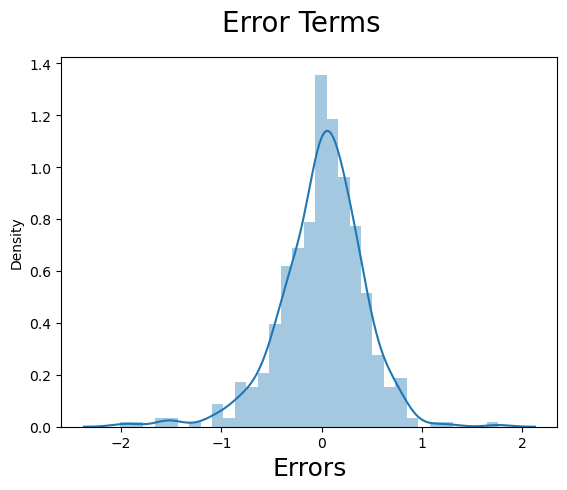

In [85]:
fig = plt.figure()
res = y_train - y_train_pred
sns.distplot(res)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)

# Using Model lm_3 on test dataset

In [86]:
bikeshare_test[cols] = scaler.transform(bikeshare_test[cols])
bikeshare_test.head()

,yr,workingday,temp,humidity,windspeed,cnt,season_Spring,season_Summer,season_Winter,mnth_Aug,...,mnth_Oct,mnth_Sept,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weather_Light,weather_Mist
184,0,0,1.304506,0.047244,-1.395126,0.799313,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
535,1,1,1.612837,-0.276917,-0.985373,0.885522,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
299,0,1,-0.112907,1.284930,0.078536,-0.937183,0,0,1,0,...,1,0,0,1,0,0,0,0,0,1
221,0,1,1.525401,-1.464502,0.110155,0.151206,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
152,0,1,1.240076,-2.307309,1.276437,0.247678,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [87]:
y_test = bikeshare_test.pop('cnt')
X_test = bikeshare_test

In [88]:
X_train_3.drop(['const'] ,axis=1, inplace=True)

In [89]:
X_test_new = X_test[X_train_3.columns]
X_test_new = sm.add_constant(X_test_new)

In [90]:
y_pred = lm_3.predict(X_test_new)

Text(0, 0.5, 'y_pred')

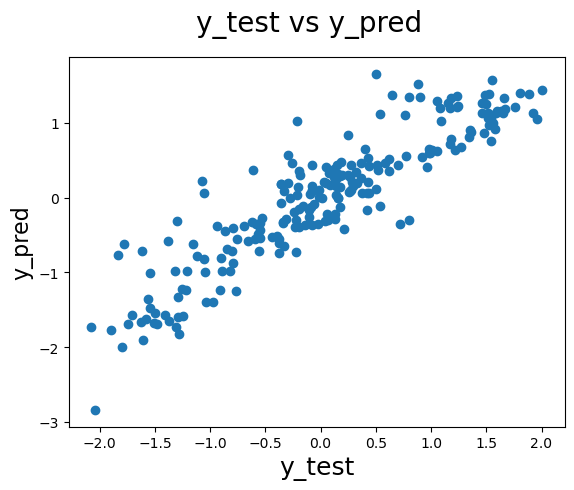

In [91]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)           
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('y_pred', fontsize=16) 

## Observing r2_score:

In [92]:
r2_model3 = r2_score(y_test, y_pred)

# Using Model lm_2 on test dataset:

In [93]:
y_test2 = y_test
X_test2 = bikeshare_test

In [94]:
X_train_2.drop(['const'] ,axis=1, inplace=True)

Text(0, 0.5, 'y_pred2')

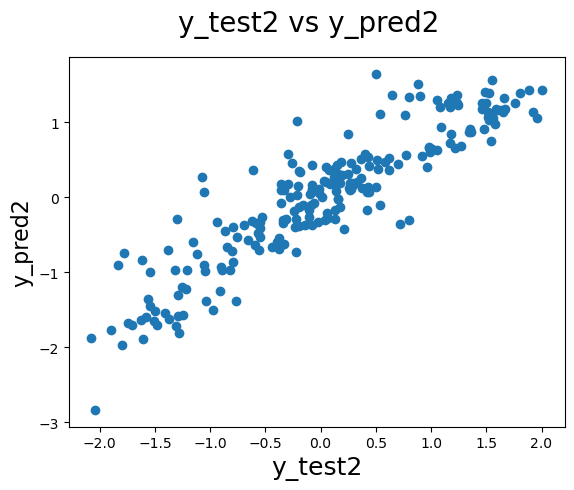

In [95]:
X_test_new2 = X_test2[X_train_2.columns]
X_test_new2 = sm.add_constant(X_test_new2)

y_pred2 = lm_2.predict(X_test_new2)

fig = plt.figure()
plt.scatter(y_test2,y_pred2)
fig.suptitle('y_test2 vs y_pred2', fontsize=20)           
plt.xlabel('y_test2', fontsize=18)                          
plt.ylabel('y_pred2', fontsize=16) 

In [96]:
r2_model2 = r2_score(y_test2, y_pred2)

# Using Model lm_1 on test dataset:

Text(0, 0.5, 'y_pred3')

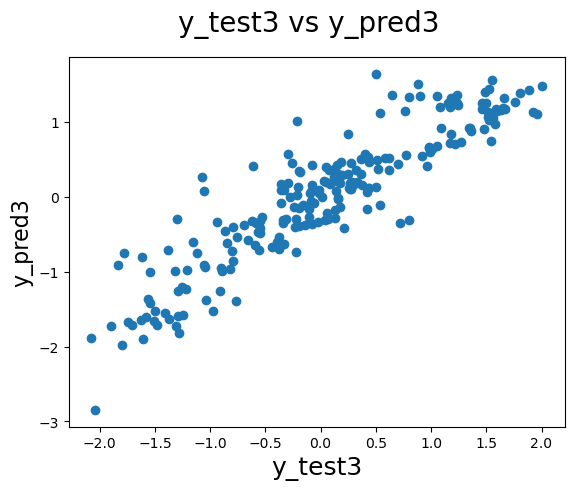

In [97]:
y_test3 = y_test
X_test3 = bikeshare_test

X_train_1.drop(['const'] ,axis=1, inplace=True)

X_test_new3 = X_test3[X_train_1.columns]
X_test_new3 = sm.add_constant(X_test_new3)

y_pred3 = lm_1.predict(X_test_new3)

fig = plt.figure()
plt.scatter(y_test3,y_pred3)
fig.suptitle('y_test3 vs y_pred3', fontsize=20)           
plt.xlabel('y_test3', fontsize=18)                          
plt.ylabel('y_pred3', fontsize=16) 

In [98]:
r2_model1 = r2_score(y_test3,y_pred3)

# Comparing r2_score values for 3 models:

In [99]:
print(r2_model3,r2_model2,r2_model1)

0.8156413451403085 0.8224169022921078 0.8229117205891918


### Observation:
- Model 1 has highest r2_score and the highest number of features as well
- Model 3 is the least complex due to lesser number of features on which the linear regression is applied.
<br>
<br>
## Reason for stopping at Model 3 (lm_3)
- Going further to implement Model 4 by removing another feature, reduces the r2_score to 0.74 on the training dataset
- Model lm_3 has r2_score = 0.8156413451403085


# Final Set of Features:
- temp
- season_Spring
- season_Winter
- mnth_Nov
- mnth_Jul
- mnth_Sept
- weather_Mist
- weather_Light
- yr
- weekday_Tuesday